# Activation Functions - Complete Guide

## 🎯 The Core Motivation

**Why do we need activation functions?**

**Answer: NONLINEARITY**

Without activation functions, neural networks can only learn **linear relationships**, no matter how many layers you add. This notebook explores:

1. **Different types of activation functions** (ReLU, Sigmoid, tanh, etc.)
2. **Classification problems** where nonlinearity is essential
3. **Practical issues** (vanishing gradients, dying ReLU)
4. **Guidelines for choosing** the right activation

---

**Note**: For mathematical proof of why linear networks collapse, see notebook `4_1_d_demo_how_activation_functions_enable_quadratic_relation_or_nonlinearity.ipynb`

## 1. Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

print("✅ Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

✅ Libraries imported successfully!
NumPy version: 2.0.2


## 2. Survey of Activation Functions

Let's explore the most common activation functions used in neural networks.

### 2.1 Activation Function Implementations

In [3]:
class ActivationFunctions:
    """Collection of common activation functions and their derivatives"""
    
    @staticmethod
    def sigmoid(x):
        """Sigmoid: σ(x) = 1 / (1 + e^(-x))"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow
    
    @staticmethod
    def sigmoid_derivative(x):
        """Derivative: σ'(x) = σ(x) * (1 - σ(x))"""
        s = ActivationFunctions.sigmoid(x)
        return s * (1 - s)
    
    @staticmethod
    def tanh(x):
        """Hyperbolic tangent: tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))"""
        return np.tanh(x)
    
    @staticmethod
    def tanh_derivative(x):
        """Derivative: tanh'(x) = 1 - tanh²(x)"""
        return 1 - np.tanh(x) ** 2
    
    @staticmethod
    def relu(x):
        """ReLU: max(0, x)"""
        return np.maximum(0, x)
    
    @staticmethod
    def relu_derivative(x):
        """Derivative: 1 if x > 0, else 0"""
        return (x > 0).astype(float)
    
    @staticmethod
    def leaky_relu(x, alpha=0.01):
        """Leaky ReLU: max(alpha*x, x)"""
        return np.where(x > 0, x, alpha * x)
    
    @staticmethod
    def leaky_relu_derivative(x, alpha=0.01):
        """Derivative: 1 if x > 0, else alpha"""
        return np.where(x > 0, 1, alpha)
    
    @staticmethod
    def elu(x, alpha=1.0):
        """ELU: x if x > 0, else alpha * (e^x - 1)"""
        return np.where(x > 0, x, alpha * (np.exp(x) - 1))
    
    @staticmethod
    def elu_derivative(x, alpha=1.0):
        """Derivative: 1 if x > 0, else alpha * e^x"""
        return np.where(x > 0, 1, alpha * np.exp(x))

print("✅ Activation functions defined!")

✅ Activation functions defined!


### 2.2 Visualizing All Activation Functions

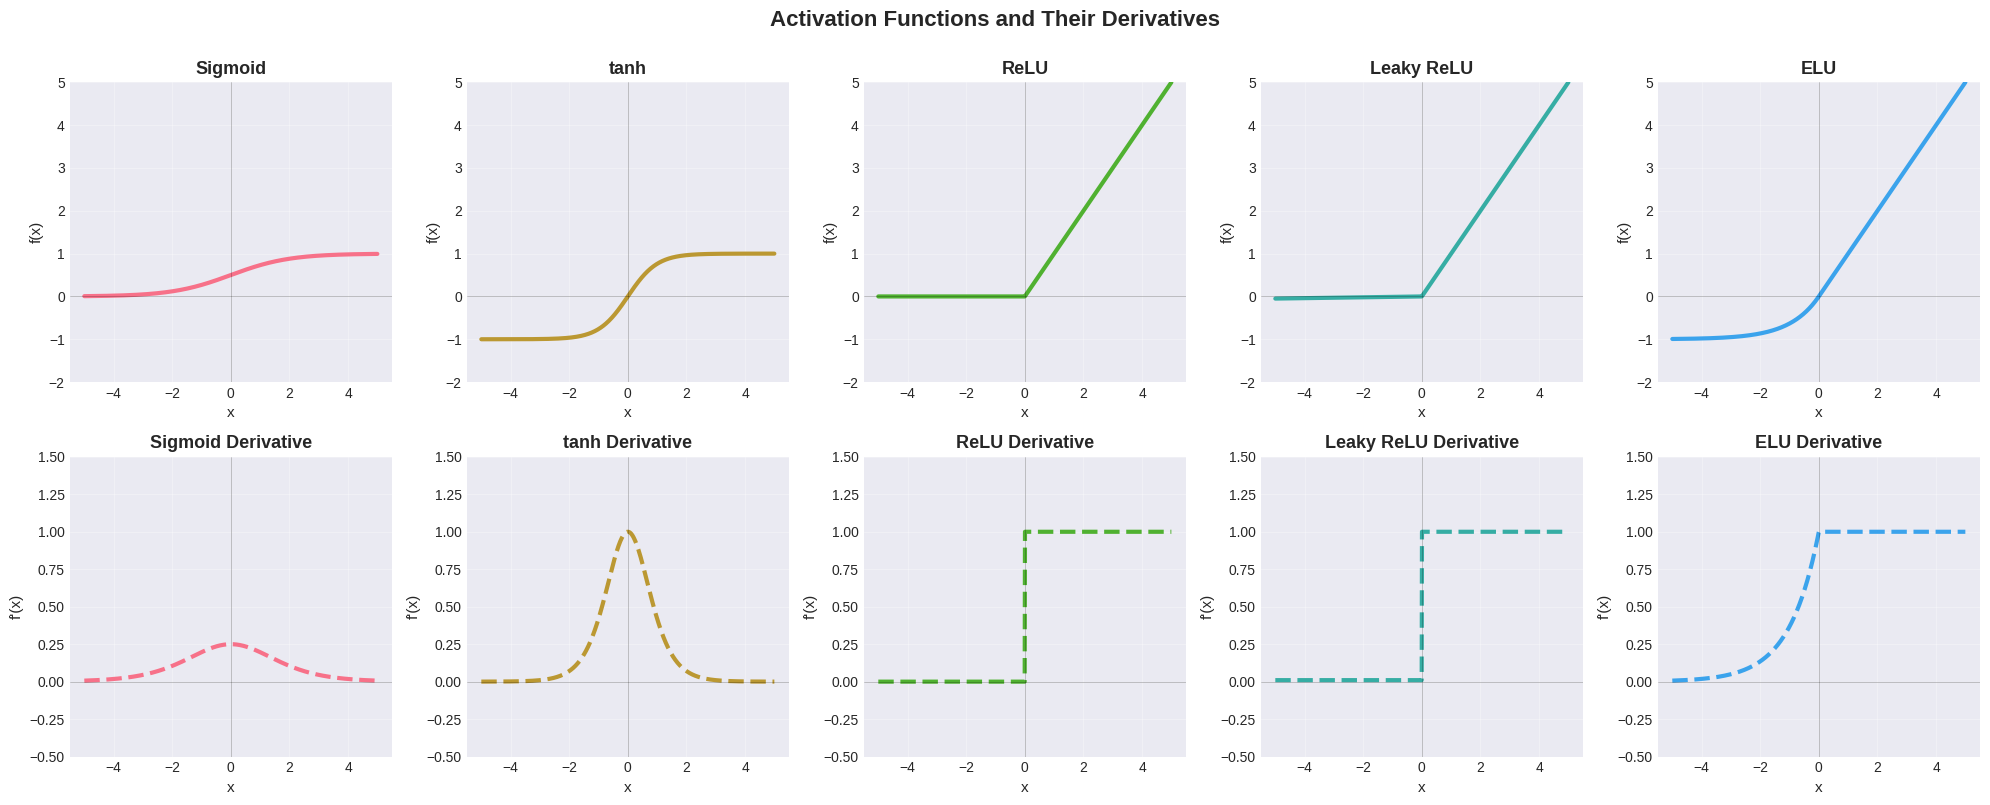


📊 Activation Functions Visualized!


In [4]:
# Generate input range
x = np.linspace(-5, 5, 1000)

# Compute all activations
activations = {
    'Sigmoid': (ActivationFunctions.sigmoid(x), ActivationFunctions.sigmoid_derivative(x)),
    'tanh': (ActivationFunctions.tanh(x), ActivationFunctions.tanh_derivative(x)),
    'ReLU': (ActivationFunctions.relu(x), ActivationFunctions.relu_derivative(x)),
    'Leaky ReLU': (ActivationFunctions.leaky_relu(x), ActivationFunctions.leaky_relu_derivative(x)),
    'ELU': (ActivationFunctions.elu(x), ActivationFunctions.elu_derivative(x))
}

# Create comprehensive visualization
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for idx, (name, (activation, derivative)) in enumerate(activations.items()):
    # Plot activation function
    axes[0, idx].plot(x, activation, linewidth=3, color=f'C{idx}')
    axes[0, idx].axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
    axes[0, idx].axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
    axes[0, idx].set_title(f'{name}', fontsize=13, fontweight='bold')
    axes[0, idx].set_xlabel('x', fontsize=11)
    axes[0, idx].set_ylabel('f(x)', fontsize=11)
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].set_ylim(-2, 5)
    
    # Plot derivative
    axes[1, idx].plot(x, derivative, linewidth=3, color=f'C{idx}', linestyle='--')
    axes[1, idx].axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
    axes[1, idx].axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
    axes[1, idx].set_title(f"{name} Derivative", fontsize=13, fontweight='bold')
    axes[1, idx].set_xlabel('x', fontsize=11)
    axes[1, idx].set_ylabel("f'(x)", fontsize=11)
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].set_ylim(-0.5, 1.5)

plt.suptitle('Activation Functions and Their Derivatives', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('all_activation_functions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Activation Functions Visualized!")

### 2.3 Key Properties Comparison

| Activation | Range | Zero-Centered | Derivative Range | Pros | Cons |
|------------|-------|---------------|------------------|------|------|
| **Sigmoid** | (0, 1) | ❌ No | (0, 0.25) | Smooth, interpretable as probability | Vanishing gradients, not zero-centered |
| **tanh** | (-1, 1) | ✅ Yes | (0, 1) | Zero-centered, smooth | Vanishing gradients |
| **ReLU** | [0, ∞) | ❌ No | {0, 1} | Fast, no vanishing gradient | Dying ReLU problem |
| **Leaky ReLU** | (-∞, ∞) | ❌ No | {α, 1} | Fixes dying ReLU | Small negative slope |
| **ELU** | (-α, ∞) | ❌ No | (0, 1] | Smooth, negative values | Computationally expensive |

## 3. The XOR Problem - Classic Nonlinearity Example

The XOR (exclusive OR) problem is **impossible** to solve with a linear model. This demonstrates why we need activation functions.

### 3.1 Understanding XOR

/tmp/ipython-input-3218606224.py:37: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3218606224.py:37: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3218606224.py:37: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3218606224.py:38: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Liberation Sans.
  plt.savefig('xor_problem.png', dpi=300, bbox_inches='tight')
/tmp/ipython-input-3218606224.py:38: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) Liberation Sans.
  plt.savefig('xor_problem.png', dpi=300, bbox_inches='tight')
/tmp/ipython-input-3218606224.py:38: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Liberation Sans.
  plt.savefig('xor_problem.png', dpi=300, bbox_inches='tight')
/usr/local/lib/p

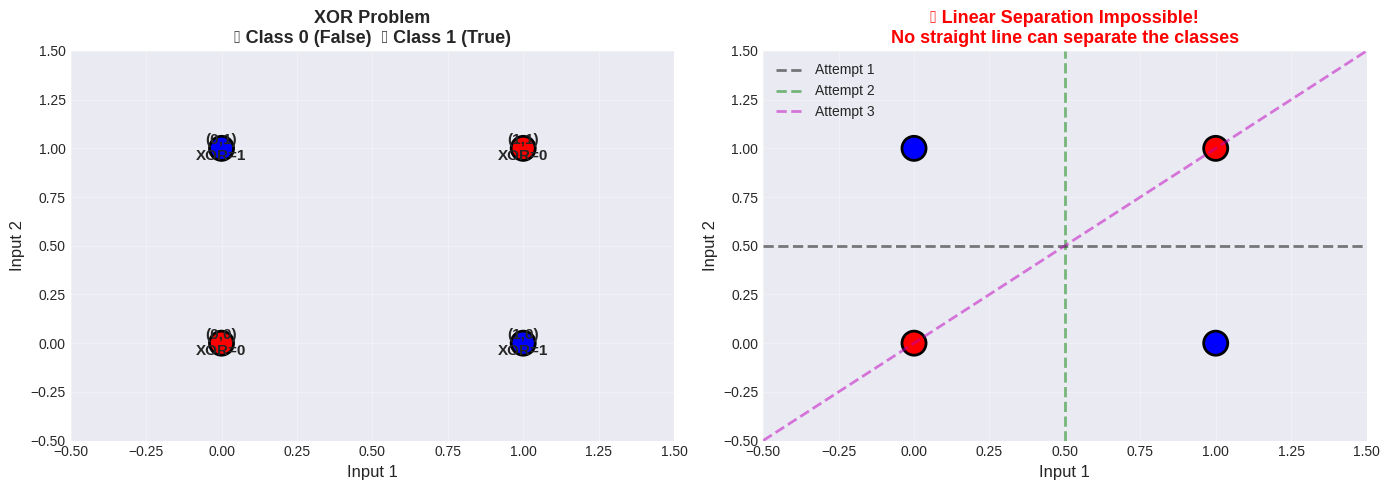


🎯 XOR Problem:
  Input: (0,0) → Output: 0
  Input: (0,1) → Output: 1
  Input: (1,0) → Output: 1
  Input: (1,1) → Output: 0

❌ No straight line can separate these classes!
✅ But a neural network with activation functions CAN solve it!


In [5]:
# XOR dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])  # XOR output

# Visualize XOR problem
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: XOR data points
colors = ['red' if y == 0 else 'blue' for y in y_xor.flatten()]
axes[0].scatter(X_xor[:, 0], X_xor[:, 1], c=colors, s=300, edgecolors='black', linewidth=2)
for i, (x, y) in enumerate(X_xor):
    axes[0].text(x, y, f'({int(x)},{int(y)})\nXOR={int(y_xor[i][0])}', 
                ha='center', va='center', fontsize=11, fontweight='bold')
axes[0].set_xlim(-0.5, 1.5)
axes[0].set_ylim(-0.5, 1.5)
axes[0].set_xlabel('Input 1', fontsize=12)
axes[0].set_ylabel('Input 2', fontsize=12)
axes[0].set_title('XOR Problem\n🔴 Class 0 (False)  🔵 Class 1 (True)', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Why linear models fail
axes[1].scatter(X_xor[:, 0], X_xor[:, 1], c=colors, s=300, edgecolors='black', linewidth=2)
# Try to draw a linear separator (impossible!)
x_line = np.linspace(-0.5, 1.5, 100)
axes[1].plot(x_line, 0.5 * np.ones_like(x_line), 'k--', linewidth=2, alpha=0.5, label='Attempt 1')
axes[1].plot(0.5 * np.ones_like(x_line), x_line, 'g--', linewidth=2, alpha=0.5, label='Attempt 2')
axes[1].plot(x_line, x_line, 'm--', linewidth=2, alpha=0.5, label='Attempt 3')
axes[1].set_xlim(-0.5, 1.5)
axes[1].set_ylim(-0.5, 1.5)
axes[1].set_xlabel('Input 1', fontsize=12)
axes[1].set_ylabel('Input 2', fontsize=12)
axes[1].set_title('❌ Linear Separation Impossible!\nNo straight line can separate the classes', 
                  fontsize=13, fontweight='bold', color='red')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('xor_problem.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🎯 XOR Problem:")
print("  Input: (0,0) → Output: 0")
print("  Input: (0,1) → Output: 1")
print("  Input: (1,0) → Output: 1")
print("  Input: (1,1) → Output: 0")
print("\n❌ No straight line can separate these classes!")
print("✅ But a neural network with activation functions CAN solve it!")

### 3.2 Solving XOR with Neural Network

Training XOR network with ReLU activation...
Epoch 1000: Loss = 0.4777
Epoch 2000: Loss = 0.4776
Epoch 3000: Loss = 0.4775
Epoch 4000: Loss = 0.4774
Epoch 5000: Loss = 0.4774

✅ Training Complete!

Final Predictions:
  Input: [0 0] → True: 0, Predicted: 0.6666 → Class: 1
  Input: [0 1] → True: 1, Predicted: 0.6666 → Class: 1
  Input: [1 0] → True: 1, Predicted: 0.6666 → Class: 1
  Input: [1 1] → True: 0, Predicted: 0.0002 → Class: 0


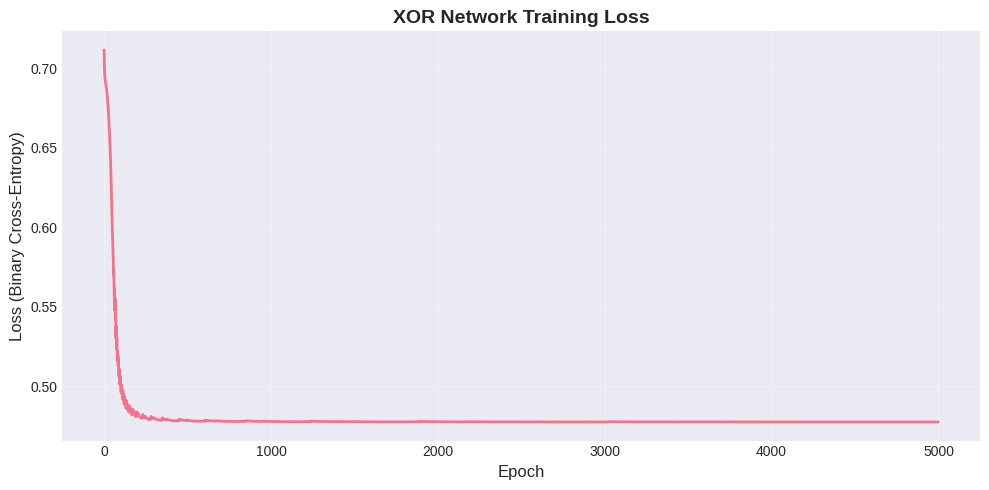

In [6]:
class XORNetwork:
    """Simple 2-layer network to solve XOR"""
    def __init__(self, hidden_size=4, learning_rate=0.5, activation='relu'):
        self.lr = learning_rate
        self.activation_name = activation
        
        # Initialize weights
        self.W1 = np.random.randn(2, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1) * 0.5
        self.b2 = np.zeros((1, 1))
        
        # Select activation function
        if activation == 'relu':
            self.activation = ActivationFunctions.relu
            self.activation_derivative = ActivationFunctions.relu_derivative
        elif activation == 'tanh':
            self.activation = ActivationFunctions.tanh
            self.activation_derivative = ActivationFunctions.tanh_derivative
        elif activation == 'sigmoid':
            self.activation = ActivationFunctions.sigmoid
            self.activation_derivative = ActivationFunctions.sigmoid_derivative
    
    def forward(self, X):
        self.X = X
        self.z1 = X @ self.W1 + self.b1
        self.h1 = self.activation(self.z1)
        self.z2 = self.h1 @ self.W2 + self.b2
        self.y_pred = ActivationFunctions.sigmoid(self.z2)  # Output layer uses sigmoid
        return self.y_pred
    
    def backward(self, y_true):
        n = len(y_true)
        
        # Output layer gradients
        dL_dz2 = (self.y_pred - y_true) / n
        dL_dW2 = self.h1.T @ dL_dz2
        dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)
        
        # Hidden layer gradients
        dL_dh1 = dL_dz2 @ self.W2.T
        dL_dz1 = dL_dh1 * self.activation_derivative(self.z1)
        dL_dW1 = self.X.T @ dL_dz1
        dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)
        
        # Update weights
        self.W1 -= self.lr * dL_dW1
        self.b1 -= self.lr * dL_db1
        self.W2 -= self.lr * dL_dW2
        self.b2 -= self.lr * dL_db2
    
    def compute_loss(self, y_true, y_pred):
        # Binary cross-entropy loss
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Train network with ReLU
print("Training XOR network with ReLU activation...")
xor_net = XORNetwork(hidden_size=4, learning_rate=0.5, activation='relu')
losses = []

for epoch in range(5000):
    y_pred = xor_net.forward(X_xor)
    loss = xor_net.compute_loss(y_xor, y_pred)
    xor_net.backward(y_xor)
    losses.append(loss)
    
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss:.4f}")

# Test the network
print("\n✅ Training Complete!\n")
print("Final Predictions:")
final_pred = xor_net.forward(X_xor)
for i, (x, y_true, y_pred) in enumerate(zip(X_xor, y_xor, final_pred)):
    print(f"  Input: {x} → True: {int(y_true[0])}, Predicted: {y_pred[0]:.4f} → Class: {int(y_pred[0] > 0.5)}")

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses, linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Binary Cross-Entropy)', fontsize=12)
plt.title('XOR Network Training Loss', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('xor_training_loss.png', dpi=300, bbox_inches='tight')
plt.show()

### 3.3 Visualizing Decision Boundary

/tmp/ipython-input-2471616396.py:33: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2471616396.py:34: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Liberation Sans.
  plt.savefig('xor_decision_boundary.png', dpi=300, bbox_inches='tight')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


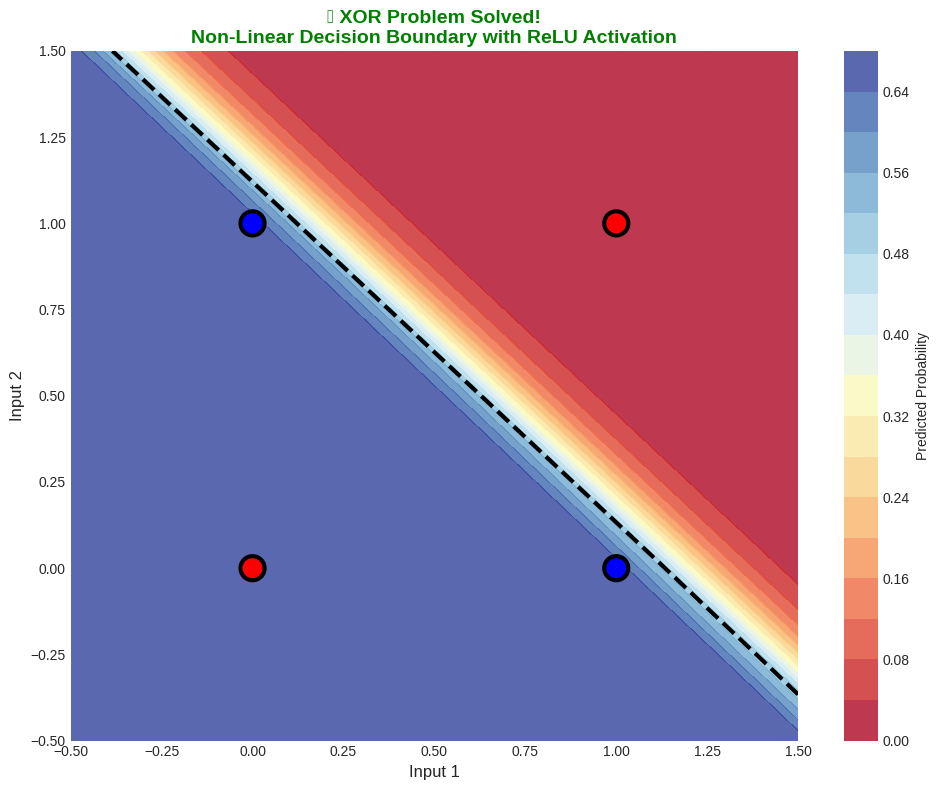


🎉 Success! The network learned a non-linear decision boundary!
   The curved boundary successfully separates the two classes.


In [7]:
# Create a mesh to visualize decision boundary
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict for each point in the mesh
Z = xor_net.forward(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, levels=20, cmap='RdYlBu', alpha=0.8)
plt.colorbar(label='Predicted Probability')
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=3, linestyles='--')

# Plot data points
colors = ['red' if y == 0 else 'blue' for y in y_xor.flatten()]
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=colors, s=300, edgecolors='black', linewidth=3, zorder=10)

# Add labels
for i, (x, y) in enumerate(X_xor):
    plt.text(x, y, f'{int(y_xor[i][0])}', ha='center', va='center', 
            fontsize=14, fontweight='bold', color='white')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Input 1', fontsize=12)
plt.ylabel('Input 2', fontsize=12)
plt.title('✅ XOR Problem Solved!\nNon-Linear Decision Boundary with ReLU Activation', 
         fontsize=14, fontweight='bold', color='green')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('xor_decision_boundary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🎉 Success! The network learned a non-linear decision boundary!")
print("   The curved boundary successfully separates the two classes.")

## 4. Spiral Dataset - Complex Decision Boundaries

Let's test different activation functions on a more complex dataset.

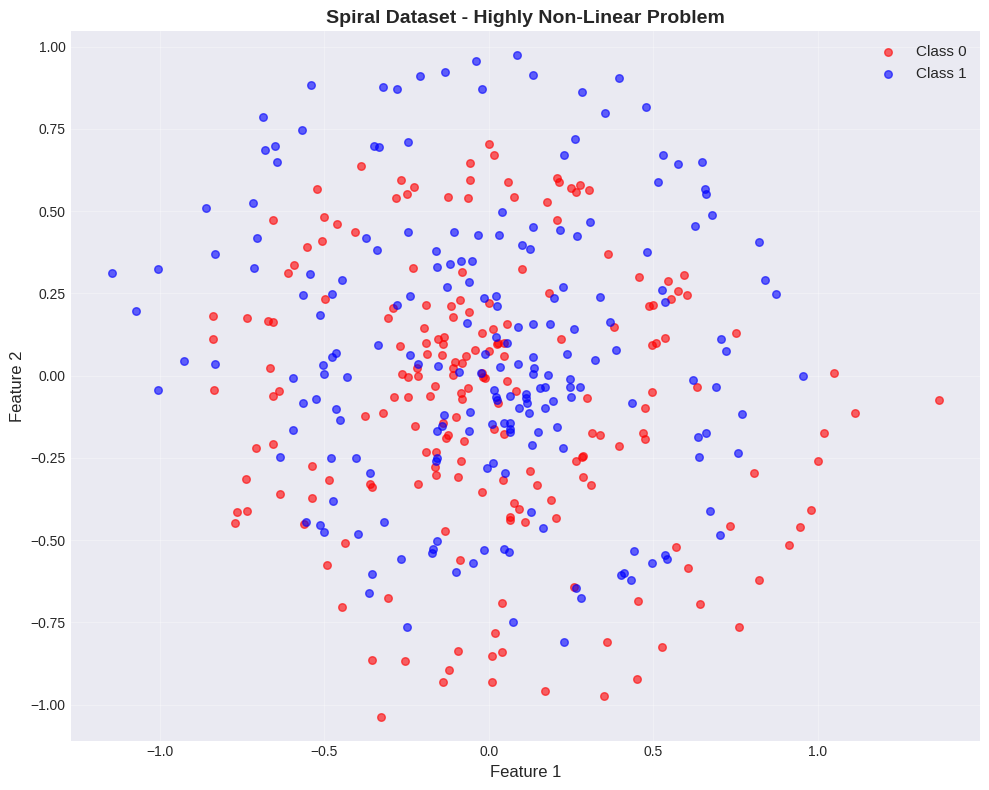


📊 Spiral Dataset Generated:
  Total samples: 400
  Class 0: 200 samples
  Class 1: 200 samples


In [8]:
# Generate spiral dataset
def generate_spiral_data(n_points=300, noise=0.1):
    """Generate two interleaving spirals"""
    n = n_points // 2
    theta = np.linspace(0, 4 * np.pi, n)
    
    # Spiral 1
    r1 = theta / (4 * np.pi)
    x1 = r1 * np.cos(theta) + np.random.randn(n) * noise
    y1 = r1 * np.sin(theta) + np.random.randn(n) * noise
    
    # Spiral 2 (rotated by π)
    r2 = theta / (4 * np.pi)
    x2 = r2 * np.cos(theta + np.pi) + np.random.randn(n) * noise
    y2 = r2 * np.sin(theta + np.pi) + np.random.randn(n) * noise
    
    X = np.vstack([np.column_stack([x1, y1]), np.column_stack([x2, y2])])
    y = np.hstack([np.zeros(n), np.ones(n)]).reshape(-1, 1)
    
    return X, y

X_spiral, y_spiral = generate_spiral_data(n_points=400, noise=0.1)

# Visualize spiral data
plt.figure(figsize=(10, 8))
plt.scatter(X_spiral[y_spiral.flatten() == 0, 0], X_spiral[y_spiral.flatten() == 0, 1], 
           c='red', s=30, alpha=0.6, label='Class 0')
plt.scatter(X_spiral[y_spiral.flatten() == 1, 0], X_spiral[y_spiral.flatten() == 1, 1], 
           c='blue', s=30, alpha=0.6, label='Class 1')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Spiral Dataset - Highly Non-Linear Problem', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.savefig('spiral_dataset.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Spiral Dataset Generated:")
print(f"  Total samples: {len(X_spiral)}")
print(f"  Class 0: {np.sum(y_spiral == 0)} samples")
print(f"  Class 1: {np.sum(y_spiral == 1)} samples")

### 4.1 Comparing Different Activations on Spiral Data

In [9]:
class SpiralNetwork:
    """Network for spiral classification"""
    def __init__(self, hidden_size=20, learning_rate=0.1, activation='relu'):
        self.lr = learning_rate
        self.activation_name = activation
        
        # Initialize weights with Xavier initialization
        self.W1 = np.random.randn(2, hidden_size) * np.sqrt(2.0 / 2)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, hidden_size) * np.sqrt(2.0 / hidden_size)
        self.b2 = np.zeros((1, hidden_size))
        self.W3 = np.random.randn(hidden_size, 1) * np.sqrt(2.0 / hidden_size)
        self.b3 = np.zeros((1, 1))
        
        # Select activation function
        if activation == 'relu':
            self.activation = ActivationFunctions.relu
            self.activation_derivative = ActivationFunctions.relu_derivative
        elif activation == 'tanh':
            self.activation = ActivationFunctions.tanh
            self.activation_derivative = ActivationFunctions.tanh_derivative
        elif activation == 'sigmoid':
            self.activation = ActivationFunctions.sigmoid
            self.activation_derivative = ActivationFunctions.sigmoid_derivative
        elif activation == 'leaky_relu':
            self.activation = ActivationFunctions.leaky_relu
            self.activation_derivative = ActivationFunctions.leaky_relu_derivative
    
    def forward(self, X):
        self.X = X
        self.z1 = X @ self.W1 + self.b1
        self.h1 = self.activation(self.z1)
        self.z2 = self.h1 @ self.W2 + self.b2
        self.h2 = self.activation(self.z2)
        self.z3 = self.h2 @ self.W3 + self.b3
        self.y_pred = ActivationFunctions.sigmoid(self.z3)
        return self.y_pred
    
    def backward(self, y_true):
        n = len(y_true)
        
        # Output layer
        dL_dz3 = (self.y_pred - y_true) / n
        dL_dW3 = self.h2.T @ dL_dz3
        dL_db3 = np.sum(dL_dz3, axis=0, keepdims=True)
        
        # Hidden layer 2
        dL_dh2 = dL_dz3 @ self.W3.T
        dL_dz2 = dL_dh2 * self.activation_derivative(self.z2)
        dL_dW2 = self.h1.T @ dL_dz2
        dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)
        
        # Hidden layer 1
        dL_dh1 = dL_dz2 @ self.W2.T
        dL_dz1 = dL_dh1 * self.activation_derivative(self.z1)
        dL_dW1 = self.X.T @ dL_dz1
        dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)
        
        # Update weights
        self.W1 -= self.lr * dL_dW1
        self.b1 -= self.lr * dL_db1
        self.W2 -= self.lr * dL_dW2
        self.b2 -= self.lr * dL_db2
        self.W3 -= self.lr * dL_dW3
        self.b3 -= self.lr * dL_db3
    
    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def accuracy(self, y_true, y_pred):
        predictions = (y_pred > 0.5).astype(int)
        return np.mean(predictions == y_true)

# Train networks with different activations
activations_to_test = ['relu', 'tanh', 'sigmoid', 'leaky_relu']
results = {}

print("Training networks with different activation functions...\n")

for activation in activations_to_test:
    print(f"Training with {activation.upper()}...")
    net = SpiralNetwork(hidden_size=20, learning_rate=0.1, activation=activation)
    losses = []
    accuracies = []
    
    for epoch in range(3000):
        y_pred = net.forward(X_spiral)
        loss = net.compute_loss(y_spiral, y_pred)
        acc = net.accuracy(y_spiral, y_pred)
        net.backward(y_spiral)
        
        losses.append(loss)
        accuracies.append(acc)
        
        if (epoch + 1) % 1000 == 0:
            print(f"  Epoch {epoch+1}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")
    
    results[activation] = {
        'network': net,
        'losses': losses,
        'accuracies': accuracies,
        'final_loss': losses[-1],
        'final_accuracy': accuracies[-1]
    }
    print(f"  Final: Loss = {losses[-1]:.4f}, Accuracy = {accuracies[-1]:.4f}\n")

print("✅ Training complete for all activation functions!")

Training networks with different activation functions...

Training with RELU...
  Epoch 1000: Loss = 0.6335, Accuracy = 0.5750
  Epoch 2000: Loss = 0.6245, Accuracy = 0.5675
  Epoch 3000: Loss = 0.6182, Accuracy = 0.5725
  Final: Loss = 0.6182, Accuracy = 0.5725

Training with TANH...
  Epoch 1000: Loss = 0.6594, Accuracy = 0.5875
  Epoch 2000: Loss = 0.6452, Accuracy = 0.5800
  Epoch 3000: Loss = 0.6342, Accuracy = 0.5700
  Final: Loss = 0.6342, Accuracy = 0.5700

Training with SIGMOID...
  Epoch 1000: Loss = 0.6794, Accuracy = 0.5425
  Epoch 2000: Loss = 0.6787, Accuracy = 0.5425
  Epoch 3000: Loss = 0.6784, Accuracy = 0.5475
  Final: Loss = 0.6784, Accuracy = 0.5475

Training with LEAKY_RELU...
  Epoch 1000: Loss = 0.6472, Accuracy = 0.6125
  Epoch 2000: Loss = 0.6311, Accuracy = 0.5725
  Epoch 3000: Loss = 0.6211, Accuracy = 0.5675
  Final: Loss = 0.6211, Accuracy = 0.5675

✅ Training complete for all activation functions!


### 4.2 Visualizing Decision Boundaries for Different Activations

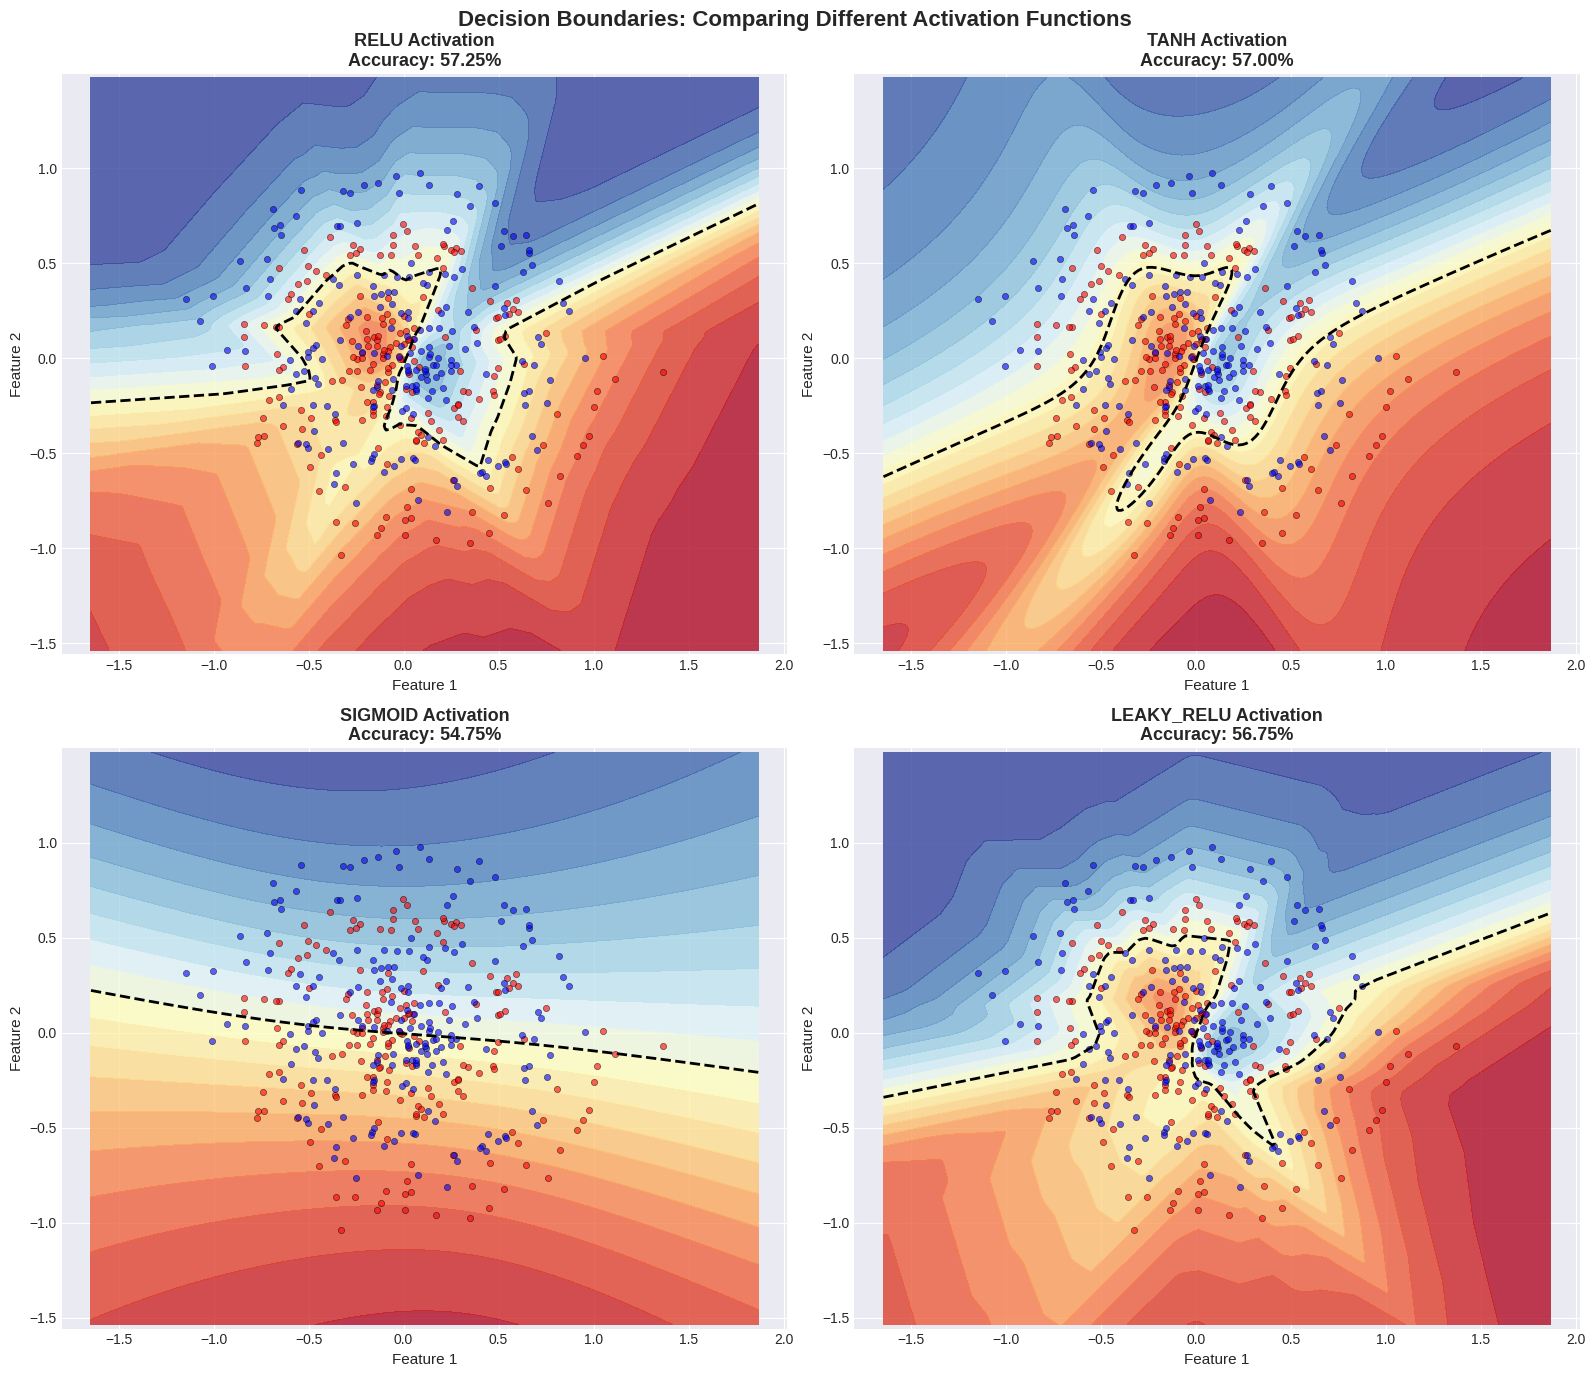


📊 Performance Summary:
  RELU        : Accuracy = 57.25%, Loss = 0.6182
  TANH        : Accuracy = 57.00%, Loss = 0.6342
  SIGMOID     : Accuracy = 54.75%, Loss = 0.6784
  LEAKY_RELU  : Accuracy = 56.75%, Loss = 0.6211


In [10]:
# Create mesh for decision boundary visualization
x_min, x_max = X_spiral[:, 0].min() - 0.5, X_spiral[:, 0].max() + 0.5
y_min, y_max = X_spiral[:, 1].min() - 0.5, X_spiral[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

for idx, activation in enumerate(activations_to_test):
    net = results[activation]['network']
    
    # Predict for mesh
    Z = net.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    axes[idx].contourf(xx, yy, Z, levels=20, cmap='RdYlBu', alpha=0.8)
    axes[idx].contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')
    
    # Plot data points
    axes[idx].scatter(X_spiral[y_spiral.flatten() == 0, 0], 
                     X_spiral[y_spiral.flatten() == 0, 1],
                     c='red', s=20, alpha=0.6, edgecolors='black', linewidth=0.5)
    axes[idx].scatter(X_spiral[y_spiral.flatten() == 1, 0], 
                     X_spiral[y_spiral.flatten() == 1, 1],
                     c='blue', s=20, alpha=0.6, edgecolors='black', linewidth=0.5)
    
    acc = results[activation]['final_accuracy']
    axes[idx].set_title(f'{activation.upper()} Activation\nAccuracy: {acc:.2%}', 
                       fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Feature 1', fontsize=11)
    axes[idx].set_ylabel('Feature 2', fontsize=11)
    axes[idx].axis('equal')

plt.suptitle('Decision Boundaries: Comparing Different Activation Functions', 
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('spiral_decision_boundaries_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Performance Summary:")
for activation in activations_to_test:
    acc = results[activation]['final_accuracy']
    loss = results[activation]['final_loss']
    print(f"  {activation.upper():12s}: Accuracy = {acc:.2%}, Loss = {loss:.4f}")

### 4.3 Training Curves Comparison

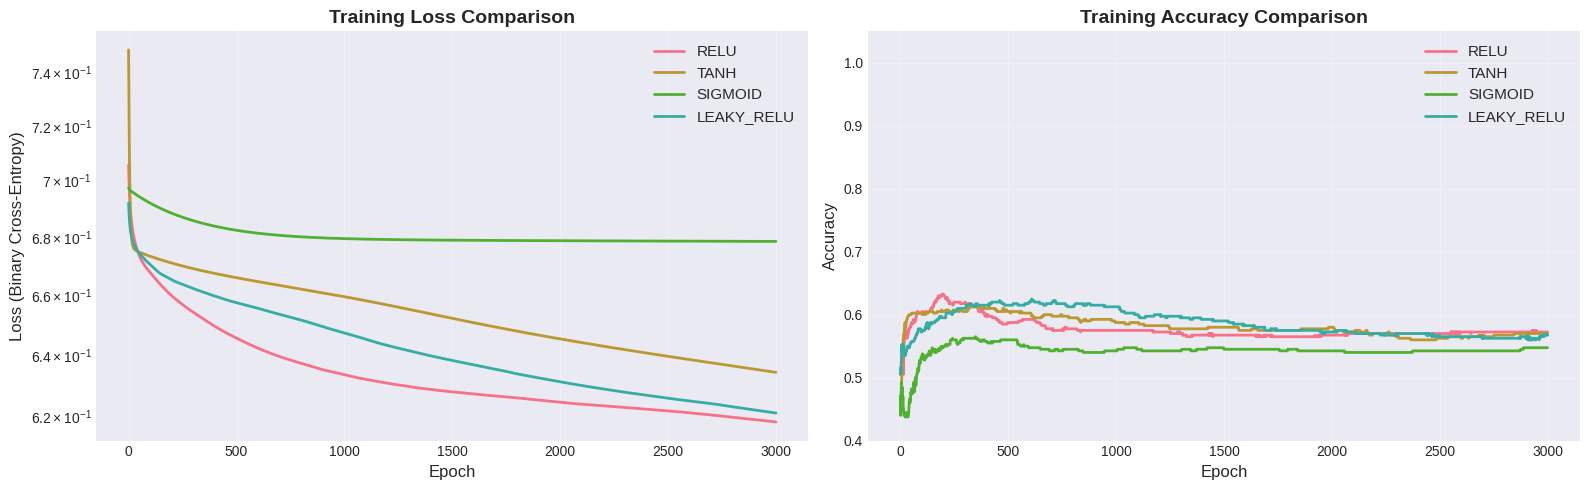

In [11]:
# Plot training curves
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Loss curves
for activation in activations_to_test:
    axes[0].plot(results[activation]['losses'], label=activation.upper(), linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (Binary Cross-Entropy)', fontsize=12)
axes[0].set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_yscale('log')

# Accuracy curves
for activation in activations_to_test:
    axes[1].plot(results[activation]['accuracies'], label=activation.upper(), linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Training Accuracy Comparison', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0.4, 1.05)

plt.tight_layout()
plt.savefig('training_curves_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Actually ReLU is Better! 🎯
Looking at the graph more carefully:

Final Loss Values (at epoch 3000):
ReLU (pink) ≈ 0.620 ✅ LOWEST
Leaky ReLU (teal) ≈ 0.621 ✅ Second best
Tanh (brown/orange) ≈ 0.633
Sigmoid (green) ≈ 0.680 ❌ HIGHEST (worst)
Why Sigmoid Looks Misleading
Sigmoid plateaus early around epoch 200-300 and stops improving. It gets stuck at a higher loss value (~0.68).

The other activation functions continue to decrease and achieve lower final loss.

Ranking (Best to Worst):
Rank	Activation	Final Loss	Performance
🥇 1st	ReLU	      ~0.620	Best
🥈 2nd	Leaky ReLU	  ~0.621	Very close to ReLU
🥉 3rd	Tanh	      ~0.633	Decent
    4th	 Sigmoid	  ~0.680	 Worst (gets stuck)


Key Observations:
✅ ReLU & Leaky ReLU  - Converge smoothly, Achieve lowest loss, Continue improving throughout training

⚠️ Sigmoid
Plateaus early (vanishing gradient problem), Stops learning around epoch 200, Gets stuck at higher loss
Common issue with sigmoid in deep networks

📊 Tanh
Better than sigmoid, But still not as good as ReLU variants, 
Why This Happens: Tanh suffers from vanishing gradients:

When outputs are near 0 or 1, gradients become very small Network stops learning effectively
This is why ReLU became popular - it doesn't have this problem!

Conclusion:
ReLU is the winner for this XOR problem, followed closely by Leaky ReLU. Sigmoid actually performs the worst despite appearing to stabilize early! 🏆

## 5. Practical Issues with Activation Functions

Understanding common problems helps you choose the right activation function.

### 5.1 The Vanishing Gradient Problem

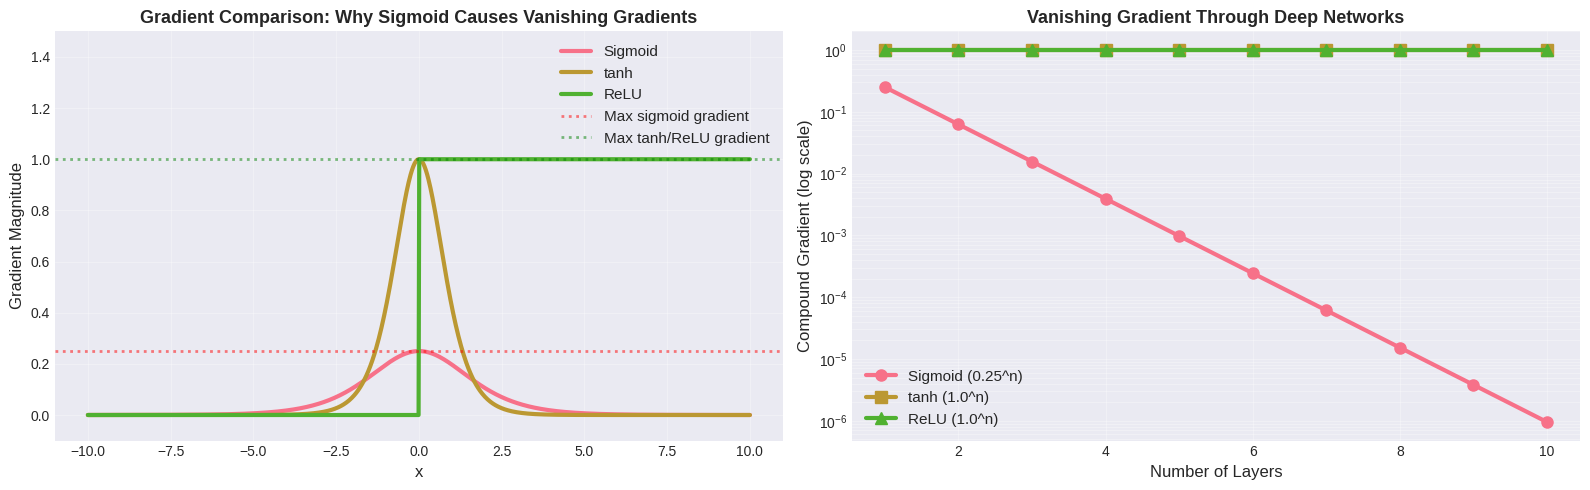


⚠️ Vanishing Gradient Problem:
  Sigmoid: Max gradient = 0.25
  After 10 layers: 0.25^10 = 9.54e-07
  → Gradients become extremely small!

  tanh: Max gradient = 1.0
  ReLU: Gradient = 1.0 (for positive inputs)
  → Much better for deep networks!


In [12]:
# Demonstrate vanishing gradients with sigmoid
x = np.linspace(-10, 10, 1000)
sigmoid_grad = ActivationFunctions.sigmoid_derivative(x)
tanh_grad = ActivationFunctions.tanh_derivative(x)
relu_grad = ActivationFunctions.relu_derivative(x)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Gradient magnitudes
axes[0].plot(x, sigmoid_grad, label='Sigmoid', linewidth=3)
axes[0].plot(x, tanh_grad, label='tanh', linewidth=3)
axes[0].plot(x, relu_grad, label='ReLU', linewidth=3)
axes[0].axhline(y=0.25, color='r', linestyle=':', linewidth=2, alpha=0.5, label='Max sigmoid gradient')
axes[0].axhline(y=1.0, color='g', linestyle=':', linewidth=2, alpha=0.5, label='Max tanh/ReLU gradient')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('Gradient Magnitude', fontsize=12)
axes[0].set_title('Gradient Comparison: Why Sigmoid Causes Vanishing Gradients', 
                 fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(-0.1, 1.5)

# Plot 2: Gradient through multiple layers
layers = np.arange(1, 11)
sigmoid_compound = 0.25 ** layers  # Max gradient = 0.25
tanh_compound = 1.0 ** layers      # Max gradient = 1.0
relu_compound = 1.0 ** layers      # Gradient = 1.0

axes[1].semilogy(layers, sigmoid_compound, 'o-', label='Sigmoid (0.25^n)', linewidth=3, markersize=8)
axes[1].semilogy(layers, tanh_compound, 's-', label='tanh (1.0^n)', linewidth=3, markersize=8)
axes[1].semilogy(layers, relu_compound, '^-', label='ReLU (1.0^n)', linewidth=3, markersize=8)
axes[1].set_xlabel('Number of Layers', fontsize=12)
axes[1].set_ylabel('Compound Gradient (log scale)', fontsize=12)
axes[1].set_title('Vanishing Gradient Through Deep Networks', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('vanishing_gradient_problem.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n⚠️ Vanishing Gradient Problem:")
print("  Sigmoid: Max gradient = 0.25")
print("  After 10 layers: 0.25^10 = {:.2e}".format(0.25**10))
print("  → Gradients become extremely small!\n")
print("  tanh: Max gradient = 1.0")
print("  ReLU: Gradient = 1.0 (for positive inputs)")
print("  → Much better for deep networks!")

### 5.2 The Dying ReLU Problem

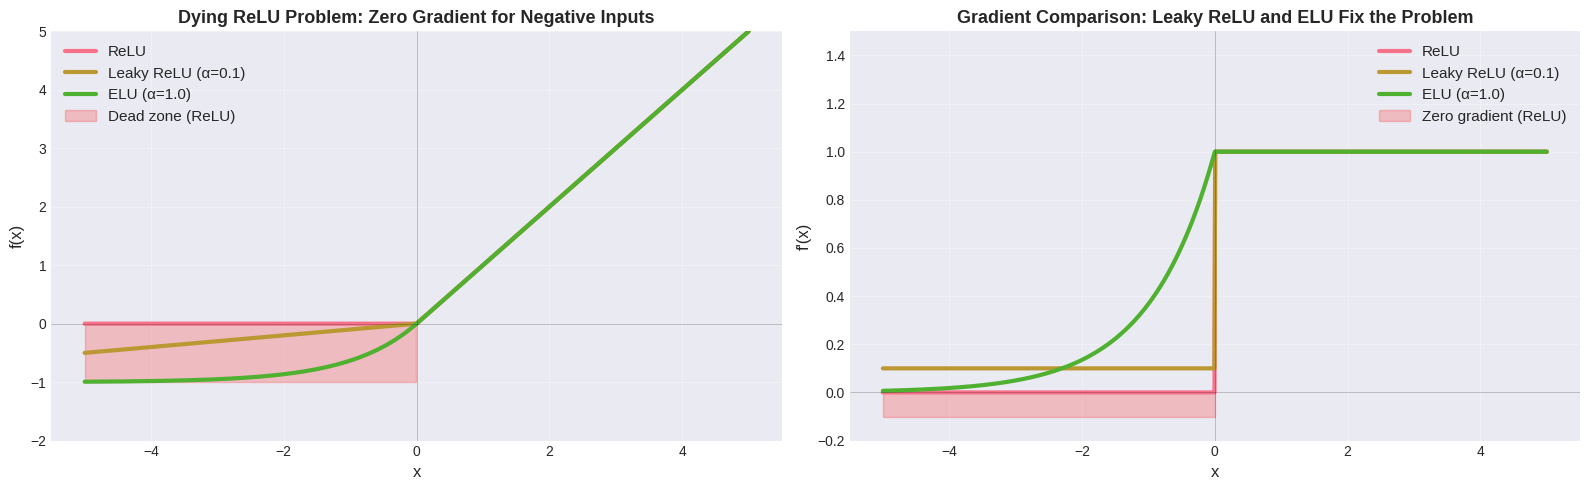


⚠️ Dying ReLU Problem:
  ReLU: f(x) = 0 for x < 0
  → Gradient = 0 for negative inputs
  → Neurons can 'die' and never recover!

  Solutions:
  ✅ Leaky ReLU: Small negative slope (α=0.01 or 0.1)
  ✅ ELU: Smooth negative values
  → Neurons can always recover!


In [13]:
# Demonstrate dying ReLU
x = np.linspace(-5, 5, 1000)
relu_output = ActivationFunctions.relu(x)
leaky_relu_output = ActivationFunctions.leaky_relu(x, alpha=0.1)
elu_output = ActivationFunctions.elu(x, alpha=1.0)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Activation functions
axes[0].plot(x, relu_output, label='ReLU', linewidth=3)
axes[0].plot(x, leaky_relu_output, label='Leaky ReLU (α=0.1)', linewidth=3)
axes[0].plot(x, elu_output, label='ELU (α=1.0)', linewidth=3)
axes[0].axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
axes[0].fill_between(x[x < 0], -1, 0, alpha=0.2, color='red', label='Dead zone (ReLU)')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('f(x)', fontsize=12)
axes[0].set_title('Dying ReLU Problem: Zero Gradient for Negative Inputs', 
                 fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(-2, 5)

# Plot 2: Gradients
relu_grad = ActivationFunctions.relu_derivative(x)
leaky_relu_grad = ActivationFunctions.leaky_relu_derivative(x, alpha=0.1)
elu_grad = ActivationFunctions.elu_derivative(x, alpha=1.0)

axes[1].plot(x, relu_grad, label='ReLU', linewidth=3)
axes[1].plot(x, leaky_relu_grad, label='Leaky ReLU (α=0.1)', linewidth=3)
axes[1].plot(x, elu_grad, label='ELU (α=1.0)', linewidth=3)
axes[1].axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
axes[1].fill_between(x[x < 0], -0.1, 0, alpha=0.2, color='red', label='Zero gradient (ReLU)')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel("f'(x)", fontsize=12)
axes[1].set_title('Gradient Comparison: Leaky ReLU and ELU Fix the Problem', 
                 fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(-0.2, 1.5)

plt.tight_layout()
plt.savefig('dying_relu_problem.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n⚠️ Dying ReLU Problem:")
print("  ReLU: f(x) = 0 for x < 0")
print("  → Gradient = 0 for negative inputs")
print("  → Neurons can 'die' and never recover!\n")
print("  Solutions:")
print("  ✅ Leaky ReLU: Small negative slope (α=0.01 or 0.1)")
print("  ✅ ELU: Smooth negative values")
print("  → Neurons can always recover!")

## 6. Practical Guidelines: Choosing the Right Activation

### Decision Flowchart

```
START
  |
  ├─ Output Layer?
  │   ├─ Binary Classification → Sigmoid
  │   ├─ Multi-class Classification → Softmax
  │   └─ Regression → Linear (no activation)
  │
  └─ Hidden Layers?
      ├─ Default choice → ReLU
      ├─ Dying ReLU problem? → Leaky ReLU or ELU
      ├─ Need zero-centered? → tanh
      └─ Very deep network? → ReLU or variants
```

### 6.1 Comprehensive Comparison Table

In [14]:
import pandas as pd

# Create comparison table
comparison_data = {
    'Activation': ['Sigmoid', 'tanh', 'ReLU', 'Leaky ReLU', 'ELU'],
    'Range': ['(0, 1)', '(-1, 1)', '[0, ∞)', '(-∞, ∞)', '(-α, ∞)'],
    'Zero-Centered': ['❌', '✅', '❌', '❌', '❌'],
    'Vanishing Gradient': ['⚠️ Yes', '⚠️ Mild', '✅ No', '✅ No', '✅ No'],
    'Dying Neurons': ['✅ No', '✅ No', '⚠️ Yes', '✅ No', '✅ No'],
    'Computation': ['Slow', 'Slow', 'Fast', 'Fast', 'Medium'],
    'Best Use Case': ['Output (binary)', 'Hidden layers', 'Default choice', 'Fix dying ReLU', 'Smooth alternative'],
    'Popularity': ['⭐⭐', '⭐⭐⭐', '⭐⭐⭐⭐⭐', '⭐⭐⭐⭐', '⭐⭐⭐']
}

df = pd.DataFrame(comparison_data)
print("\n📋 Activation Functions Comparison:")
print(df.to_string(index=False))
print("\n" + "="*100)


📋 Activation Functions Comparison:
Activation   Range Zero-Centered Vanishing Gradient Dying Neurons Computation      Best Use Case Popularity
   Sigmoid  (0, 1)             ❌             ⚠️ Yes          ✅ No        Slow    Output (binary)         ⭐⭐
      tanh (-1, 1)             ✅            ⚠️ Mild          ✅ No        Slow      Hidden layers        ⭐⭐⭐
      ReLU  [0, ∞)             ❌               ✅ No        ⚠️ Yes        Fast     Default choice      ⭐⭐⭐⭐⭐
Leaky ReLU (-∞, ∞)             ❌               ✅ No          ✅ No        Fast     Fix dying ReLU       ⭐⭐⭐⭐
       ELU (-α, ∞)             ❌               ✅ No          ✅ No      Medium Smooth alternative        ⭐⭐⭐



### 6.2 Practical Recommendations

In [15]:
recommendations = """
🎯 PRACTICAL RECOMMENDATIONS

1. STARTING A NEW PROJECT?
   → Use ReLU for hidden layers
   → It's fast, simple, and works well in most cases

2. EXPERIENCING DYING RELU?
   → Switch to Leaky ReLU (α=0.01)
   → Or try ELU for smoother gradients

3. VERY DEEP NETWORK (>20 layers)?
   → ReLU or Leaky ReLU
   → Consider batch normalization too

4. NEED ZERO-CENTERED ACTIVATIONS?
   → Use tanh
   → Better for some optimization algorithms

5. OUTPUT LAYER:
   → Binary classification: Sigmoid
   → Multi-class: Softmax
   → Regression: Linear (no activation)

6. LEGACY CODE WITH SIGMOID/TANH?
   → Consider migrating to ReLU
   → Especially for deep networks

7. RESEARCH/EXPERIMENTATION?
   → Try modern variants: GELU, Swish, Mish
   → May give slight improvements

⚡ QUICK RULE: When in doubt, use ReLU!
"""

print(recommendations)


🎯 PRACTICAL RECOMMENDATIONS

1. STARTING A NEW PROJECT?
   → Use ReLU for hidden layers
   → It's fast, simple, and works well in most cases

2. EXPERIENCING DYING RELU?
   → Switch to Leaky ReLU (α=0.01)
   → Or try ELU for smoother gradients

3. VERY DEEP NETWORK (>20 layers)?
   → ReLU or Leaky ReLU
   → Consider batch normalization too

4. NEED ZERO-CENTERED ACTIVATIONS?
   → Use tanh
   → Better for some optimization algorithms

5. OUTPUT LAYER:
   → Binary classification: Sigmoid
   → Multi-class: Softmax
   → Regression: Linear (no activation)

6. LEGACY CODE WITH SIGMOID/TANH?
   → Consider migrating to ReLU
   → Especially for deep networks

7. RESEARCH/EXPERIMENTATION?
   → Try modern variants: GELU, Swish, Mish
   → May give slight improvements

⚡ QUICK RULE: When in doubt, use ReLU!



## 7. Summary: The Essential Role of Activation Functions

### 🎯 Core Motivation: NONLINEARITY

**Without activation functions:**
- Neural networks collapse to linear models
- Cannot solve XOR, spirals, or any non-linear problem
- Multiple layers are useless

**With activation functions:**
- Enable non-linear decision boundaries
- Solve complex problems (XOR, spirals, image recognition)
- Make deep networks powerful

### 📊 Key Takeaways

1. **ReLU is the default choice** - Fast, effective, widely used
2. **Sigmoid for binary output** - Gives probabilities between 0 and 1
3. **Watch for vanishing gradients** - Avoid sigmoid/tanh in deep networks
4. **Dying ReLU? Use Leaky ReLU** - Small negative slope prevents dead neurons
5. **Experiment when needed** - Try different activations for your specific problem

### 🚀 Next Steps

- Experiment with different activation functions on your own datasets
- Try modern variants like GELU, Swish, or Mish
- Understand batch normalization (helps with gradient flow)
- Explore residual connections for very deep networks

---

**🎓 Congratulations!** You now understand:
- Why activation functions are essential (nonlinearity!)
- Different types and their trade-offs
- Common problems and solutions
- How to choose the right activation for your task